<a href="https://colab.research.google.com/github/emilianotiago/mvp_Sprint_MachineLearning/blob/main/MVP_Machine_Learning_%26_Analytics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Machine Learning & Analytics

**Nome:** Tiago Leite Emiliano

**Matrícula:** 111.704.796-26

**Dataset:** Coffe Sales (https://www.kaggle.com/datasets/ihelon/coffee-sales)



# Descrição do Problema
Este conjunto de dados contém registros detalhados de vendas de café de uma máquina de venda automática.

A base de dados se destina à análise de padrões de compra dos clientes, preferências do cliente relacionadas a produtos e faturamento médio.

O conjunto de dados abrange de março de 2024 até fevereiro de 2025, capturando dados de transações diárias realizadas nesse ano corrente.

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- Quais são os tipos de café mais vendidos pela máquina?
- Existe alguma faixa de horário de preferencia dos clientes?
- Qual é a forma de pagamento de preferencia dos clientes?
- Existe alguma relação entre tipos de produto vendidos e horário de compra?
- Quais são as horas do dia que mais se vende?
- Considerando que um cliente fidelizado comprou em média 20 vezes (aprox. 2 vezes no mês) no último ano, conseguimos determinar quem são e a quantidade de pessoas nessa categoria?
- Para a atualização de ML, vamos propor uma recomendação de um produto baseado no momentos de compra do cliente, criando um algoritmo que faça essa indicação.

## Tipo de Problema

Este é um problema de **classificação supervisionada.** Dado que temos a frequencia de compra dos clientes, queremos determinar quem é fidelizado ou cliente novo. Isso também definirá quais os algoritmos a serem utiliados para fazermos a indicação do produto.

## Seleção de Dados

O dataset Coffee Sales é recomendado no Kaggle por completar todos os requisitos de usabilidade da plataforma e ter nota máxima nesse sentido, o que garante uma uniformidade dos dados a serem utilizados. Fiz algumas analises explortórias iniciais na base para entender se precisava de alguma tratativa de limpeza, e não observei essa necessidade.

## Atributos do Dataset


O dataset contem 3263 linhas de transações realizadas com 6 atributos:
- ***date*** (data da compra)
- ***datetime*** (data e hora da compra)
- ***cash_type*** (tipo de pagamento realizado)
- ***card*** (numero do cartão utilizada)
- ***money*** (valor pago)
- ***coffee_name*** (tipo de produto vendido)

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset.

In [ ]:
# Configuração para não exibir os warnings
#import warnings
#warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/emilianotiago/dados_coffee-sales/refs/heads/main/index_1.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Verificando os tipos de cada coluna
dataset.dtypes


,0
date,object
datetime,object
cash_type,object
card,object
money,float64
coffee_name,object


In [ ]:
# Exibindo as primeiras linhas
dataset.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [ ]:
#Exibindo últimas linhas
dataset.tail()

,date,datetime,cash_type,card,money,coffee_name
3258,2025-02-25,2025-02-25 14:14:18.541,card,ANON-0000-0000-1161,35.76,Cappuccino
3259,2025-02-25,2025-02-25 16:49:37.395,card,ANON-0000-0000-0019,25.96,Americano
3260,2025-02-25,2025-02-25 16:50:35.811,card,ANON-0000-0000-0019,25.96,Americano
3261,2025-02-25,2025-02-25 18:19:09.057,card,ANON-0000-0000-1234,35.76,Cocoa
3262,2025-02-25,2025-02-25 19:32:40.434,card,ANON-0000-0000-1152,35.76,Cappuccino


In [ ]:
#Nomes das colunas
dataset.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

In [ ]:
#Dimensão do dataset
dataset.shape


(3263, 6)

In [ ]:
#Linhas por coluna
dataset.count()

,0
date,3263
datetime,3263
cash_type,3263
card,3174
money,3263
coffee_name,3263


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset Coffee Sales, visamos entender a distribuição em vendas, tipos de produtos e tempo para termos uma modelagem adequada ao desafio do negócio.

## Total e Tipo das Instâncias

O dataset possui 3263 instâncias (observações), com 3174 instâncias definindo o tipo de pagamento card (cartão de crédito). As colunas date, datetime, cash_type, card e coffe_name são tipo categórico, enquanto money é numérico (float).

In [ ]:
print(f"Total de instâncias: {len(dataset)}")
print("\nTipos de dados por coluna:")
print(dataset.info())

Total de instâncias: 3263

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3263 non-null   object 
 1   datetime     3263 non-null   object 
 2   cash_type    3263 non-null   object 
 3   card         3174 non-null   object 
 4   money        3263 non-null   float64
 5   coffee_name  3263 non-null   object 
dtypes: float64(1), object(5)
memory usage: 153.1+ KB
None


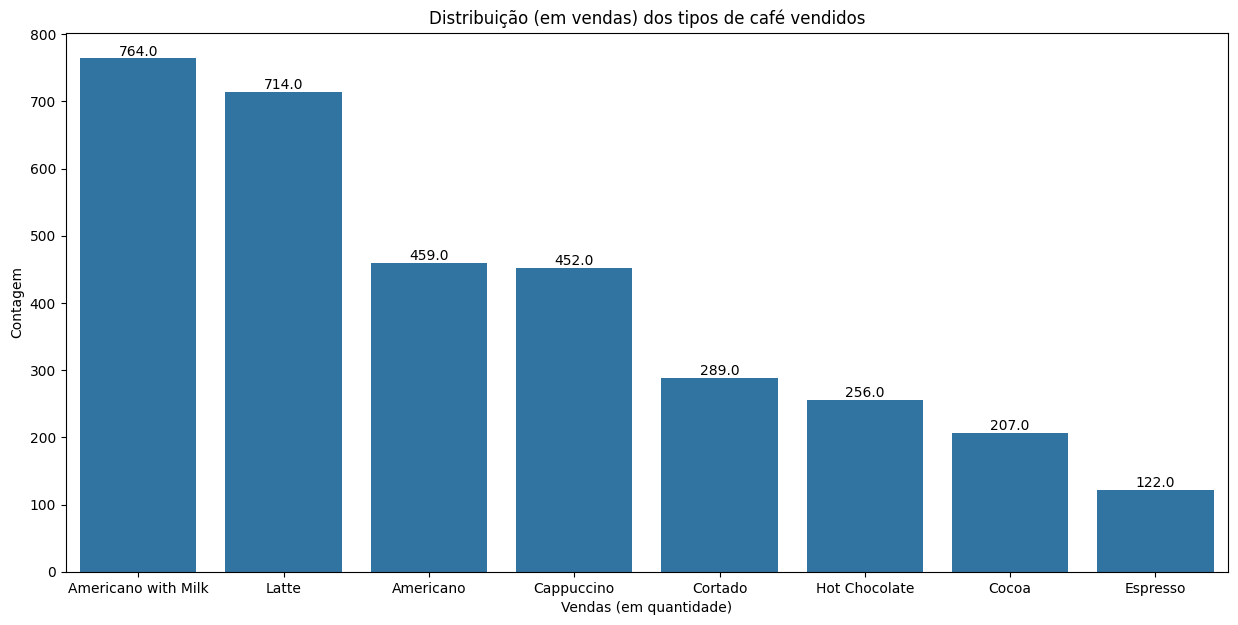

In [ ]:
plt.figure(figsize=(15, 7))

# Obter a ordem dos tipos de café pela contagem de vendas
order = dataset['coffee_name'].value_counts().index

# gráfico de barras simples, ordenado pela contagem de vendas
ax = sns.countplot(x='coffee_name', data=dataset, order=order)
plt.title('Distribuição (em vendas) dos tipos de café vendidos')
plt.xlabel('Vendas (em quantidade)')
plt.ylabel('Contagem')

# Adicionar rótulos de dados
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

O gráfico de barras mostra que os produtos mais vendidos nesse último ano foi o Americano with Milk e Latte com mais de 700 vendas realizadas, seguidos por Americano e Capuccino, com cerca de 450 vendas cada produto.

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [ ]:
# estatísticas descritivas básicas do dataset
display(dataset.describe())

,money
count,3263.000000
mean,31.798682
std,4.939635
min,18.120000
25%,27.920000
50%,32.820000
75%,35.760000
max,40.000000


### Utilizando a média para chegar no ticket médio do negócio

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [ ]:
# média do atributo numérico 'money' do dataset
mean_money = dataset['money'].mean()
print(f"O ticket médio do valor das vendas é de: U${mean_money:.2f}")

O ticket médio do valor das vendas é de: U$31.80


### Tipo de pagamento mais comum (Proporção)

In [ ]:
# Contar a frequência de cada tipo de pagamento
payment_type_counts = dataset['cash_type'].value_counts().reset_index()

# Renomear as colunas para o formato desejado
payment_type_counts.columns = ['Tipo de Pagamento', 'Total de vendas por tipo de pagamento']

# Exibir o DataFrame resultante sem o índice
display(payment_type_counts.style.hide(axis="index"))

Tipo de Pagamento,Total de vendas por tipo de pagamento
card,3174
cash,89


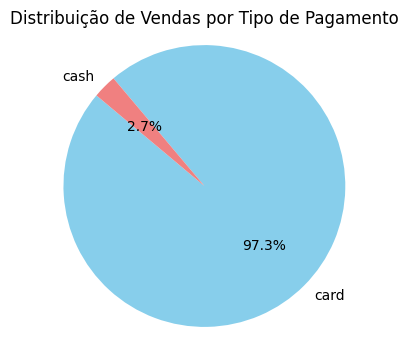

In [ ]:
# Contar a frequência de cada tipo de pagamento
payment_counts = dataset['cash_type'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(4, 4))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribuição de Vendas por Tipo de Pagamento')
plt.axis('equal') # Garante que o gráfico de pizza seja um círculo.
plt.show()

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [ ]:

# desvio padrão do atributo numérico 'money' do dataset
std_money = dataset['money'].std()
print(f"O desvio padrão do valor das vendas é de {std_money:.2f}")

O desvio padrão do valor das vendas é de 4.94


In [ ]:
# Calcular o coeficiente de variação
coefficient_of_variation = (std_money / mean_money) * 100

# Exibir o coeficiente de variação formatado para duas casas decimais
print(f"O coeficiente de variação do valor das vendas é de {coefficient_of_variation:.2f}%.")

O coeficiente de variação do valor das vendas é de 15.53%.


In [ ]:
# Calcular a quantidade vendida de cada tipo de café
coffee_counts = dataset['coffee_name'].value_counts().reset_index()
coffee_counts.columns = ['coffee_name', 'quantidade_vendida']

# Calcular a média do valor das vendas por tipo de café (já fizemos isso, mas vamos garantir que temos)
mean_money_by_coffee = dataset.groupby('coffee_name')['money'].mean().reset_index()
mean_money_by_coffee.columns = ['coffee_name', 'media_dinheiro']


# Combinar as duas informações em um único DataFrame
coffee_summary = pd.merge(mean_money_by_coffee, coffee_counts, on='coffee_name')

# Calcular o total geral de vendas
total_vendas = coffee_summary['quantidade_vendida'].sum()

# Calcular a porcentagem de vendas para cada tipo de café
coffee_summary['percentual_vendas (%)'] = (coffee_summary['quantidade_vendida'] / total_vendas) * 100

# Ordenar a tabela pela quantidade vendida em ordem decrescente
coffee_summary_sorted = coffee_summary.sort_values(by='quantidade_vendida', ascending=False).reset_index(drop=True) # Reset index after sorting

# Calcular o percentual acumulado
coffee_summary_sorted['percentual_acumulado (%)'] = coffee_summary_sorted['percentual_vendas (%)'].cumsum()


# Exibir o DataFrame resultante ordenado com o percentual
display(coffee_summary_sorted)

,coffee_name,media_dinheiro,quantidade_vendida,percentual_vendas (%),percentual_acumulado (%)
0,Americano with Milk,30.651204,764,23.414036,23.414036
1,Latte,35.622717,714,21.881704,45.295740
2,Americano,26.085011,459,14.066810,59.362550
3,Cappuccino,36.021903,452,13.852283,73.214833
4,Cortado,25.802699,289,8.856880,82.071713
5,Hot Chocolate,36.104297,256,7.845541,89.917254
6,Cocoa,35.704348,207,6.343855,96.261109
7,Espresso,20.996393,122,3.738891,100.000000


### Observações Gerais sobre as Estatísticas Descritivas

Com os dados acima, é possível chegar em algumas conclusões sobre os dados:
 - Estamos com a venda concentrada em 4 produtos, representando aproximadamente 73% das vendas realizadas pela máquina;
 - Com a média de valor das vendas em U$ 31,80 e um coeficiente de varição em 15,5%, temos uma variação nas vendas considarada moderada, número impactado pela concentração grande em poucos produtos e até por uma variação pequena dos preços entre esses produtos com melhor performance;
 - Claramente o cliente prefere usar o cartão de crédito para pagamentos;
 - U\$ 40 parece realmente o limite pago pelos clientes no produtos. O que não indica que o cliente não possa pagar mais, mas parece um limite determinado pelo negócio.


## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

### Como os preço dos produtos variaram  durante o período?


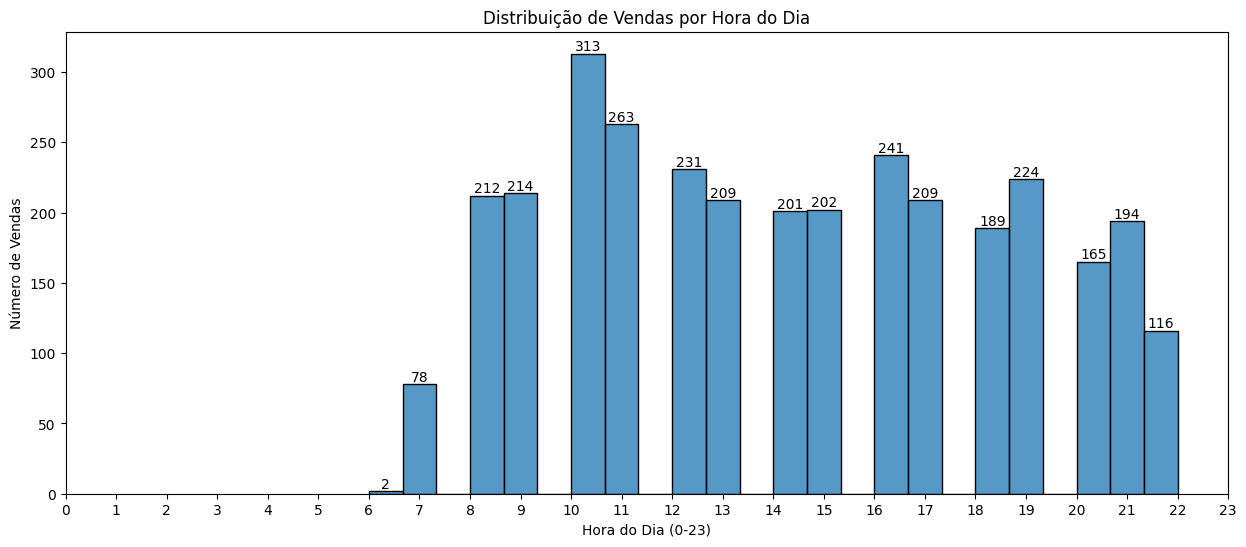

In [ ]:
# Converter a coluna 'datetime' para o tipo datetime, se ainda não estiver
dataset['datetime'] = pd.to_datetime(dataset['datetime'])

# Extrair a hora do dia da coluna 'datetime'
dataset['hour'] = dataset['datetime'].dt.hour

# Criar um histograma da distribuição das vendas por hora
plt.figure(figsize=(15, 6))
ax = sns.histplot(data=dataset, x='hour', bins=24, kde=False)
plt.title('Distribuição de Vendas por Hora do Dia')
plt.xlabel('Hora do Dia (0-23)')
plt.ylabel('Número de Vendas')
plt.xticks(range(0, 24)) # Garantir que todos os rótulos de hora sejam exibidos
plt.grid(False) # Remover as linhas de grade

# Adicionar rótulos de dados
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Apenas adicione rótulos se a altura for maior que 0
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

O histograma mostra a distribuição das vendas em horas do dia mostra que as vendas começam as 6 da manhã e terminam as 22 horas.
As vendas tem um leve pico entre 10 e 11 da manhã, mas segue bem estável ao longo do dia, tendo uma queda após as 20 horas.

Temos claras paradas em vendas entre algumas horas, o que pode ser explicado por possíveis paradas para reposição de produtos.

## Boxplot


### Variação de preços praticados por produto

Olhando mais no detalhe os produtos vendidos, conseguimos determinar melhor como funciona a política de preços e suas variações.


In [ ]:
# Estatísticas descritivas do atributo numérico 'money' agrupadas por tipo de café
display(dataset.groupby('coffee_name')['money'].describe())

,count,mean,std,min,25%,50%,75%,max
coffee_name,,,,,,,,
Americano,459.0,26.085011,1.952754,23.02,25.96,25.96,27.92,30.0
Americano with Milk,764.0,30.651204,2.014770,27.92,27.92,30.86,32.82,35.0
Cappuccino,452.0,36.021903,2.005409,32.82,35.76,35.76,37.72,40.0
Cocoa,207.0,35.704348,1.417267,32.82,35.76,35.76,35.76,40.0
Cortado,289.0,25.802699,2.159560,23.02,23.02,25.96,27.92,30.0
Espresso,122.0,20.996393,2.178889,18.12,18.12,21.06,23.02,25.0
Hot Chocolate,256.0,36.104297,1.600248,32.82,35.76,35.76,35.76,40.0
Latte,714.0,35.622717,2.026518,32.82,32.82,35.76,37.72,40.0


<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2010774035.py:6: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel('U\$\$') # Corrigido para escapar os símbolos de dólar


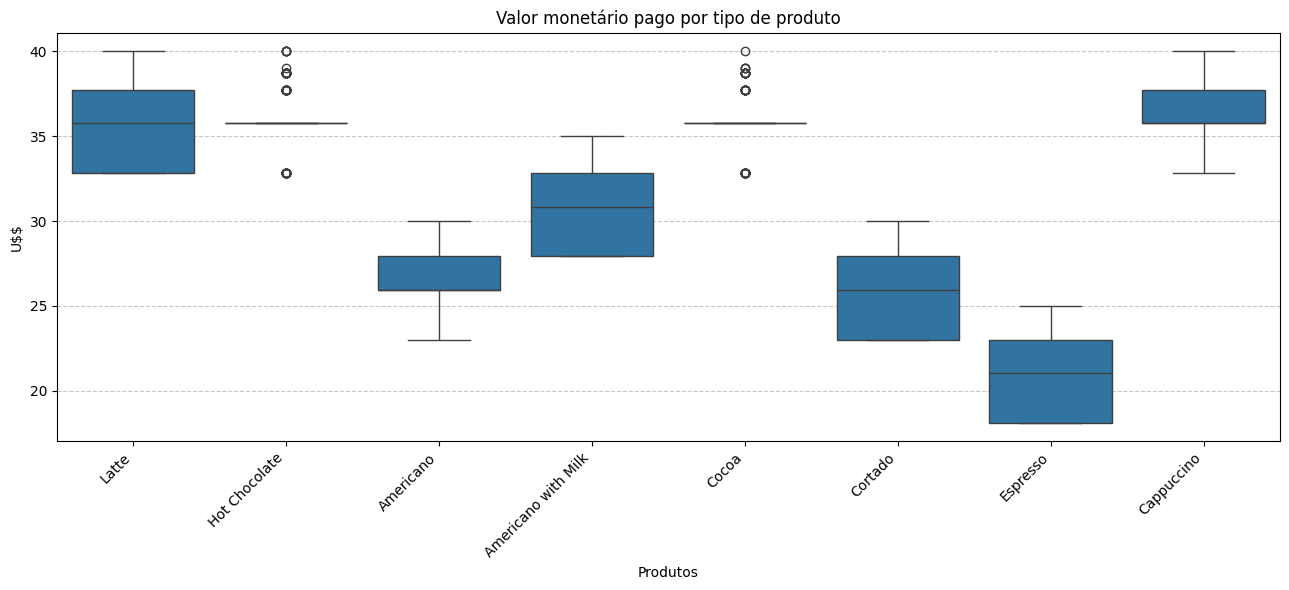

In [ ]:
# Boxplot do valor monetário pago por tipo de produto
plt.figure(figsize=(13, 6))
sns.boxplot(x='coffee_name', y='money', data=dataset)
plt.title('Valor monetário pago por tipo de produto')
plt.xlabel('Produtos')
plt.ylabel('U\$\$') # Corrigido para escapar os símbolos de dólar
plt.xticks(rotation=45, ha='right') # Rotacionar rótulos do eixo X para melhor visualização
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adicionar linhas de grade horizontais
plt.tight_layout() # Ajustar layout para evitar sobreposição de rótulos
plt.show()

O boxplot mostra que temos claras diferenças em políticas de preço por produto. Quando olhamos o Americano with Milk e Latte (carros-chefes em vendas) vemos medianas em patamares diferentes (U\$ 32 e U\$ 37, respectivamente) e como eles vendem em patamares parecidos, o Latte aparenta ser um produto mais interessante do negócio.

Destaca-se também itens como Hot Chocolate, Cocoa e Capuccino trabalhando em preços bem acima do preço médio do negócio, sendo entre eles o Cappuccino com melhor performance de vendas entre eles, o que mostra que sabor está determinando mais o perfil de compra entre produtos do que necessariamente o preço.

### Vendas de produtos por faixa de horário
Podemos também determinar a variação de vendas do produtos por hora. Como mostra o boxplot abaixo, existe uma concentração do consumo entrea aproximadamente 11 da manhã a 16 horas (olhando comportamento das medianas) sendo o Hot Chocolate sendo consumido mais tarde (prox. as 17 horas) e o Cortado, com o seu fluxo acontecendo mais cedo (prox. as 11 da manhã).

Isso pode determinar as necessidades de reposição evitando esse horário de fluxo e conseguindo antecipar essa demanda durante todo o dia. (gráfico abaixo)

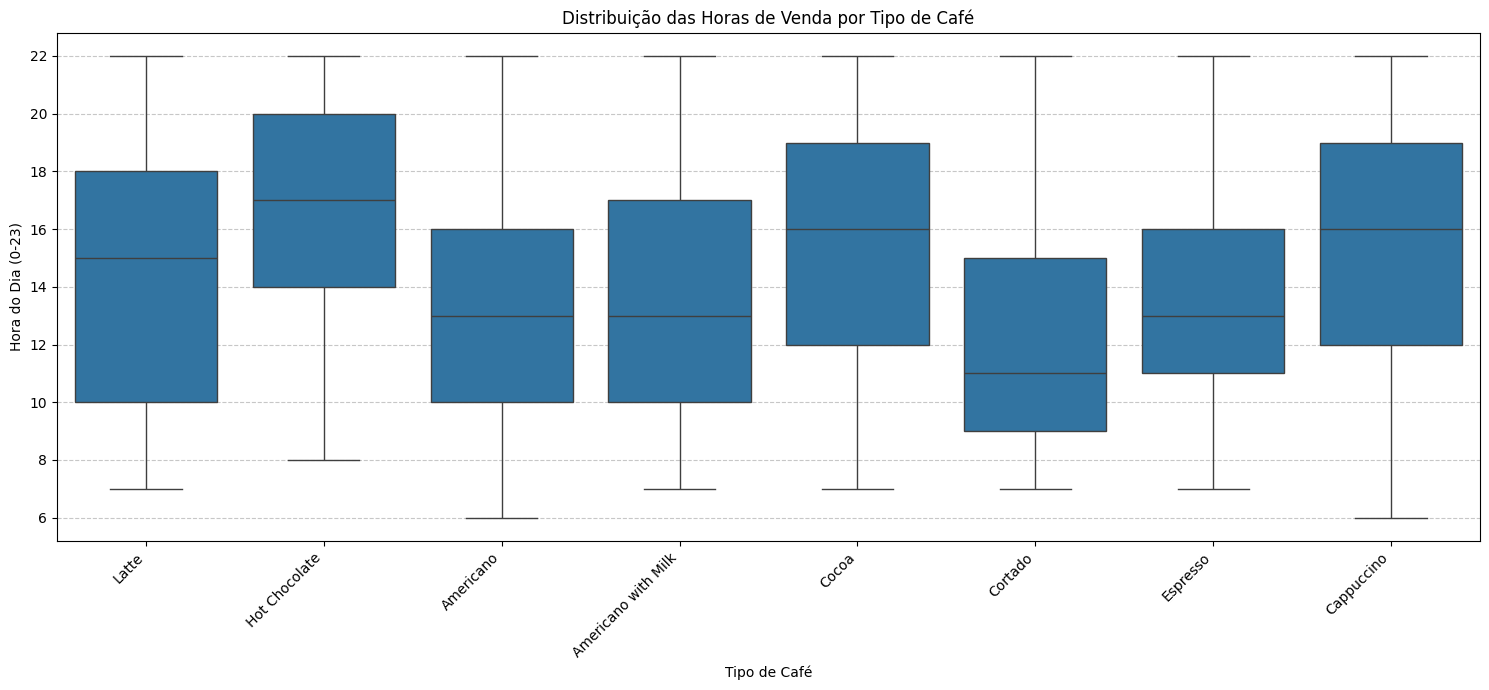

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='coffee_name', y='hour', data=dataset)
plt.title('Distribuição das Horas de Venda por Tipo de Café')
plt.xlabel('Tipo de Café')
plt.ylabel('Hora do Dia (0-23)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Clientes Fidelizados

Existem clientes fidelizados? Abaixo segue uma análise, olhando para a dispersão, de como os clientes se comportam, baseado na sua frequencia de compra.

In [ ]:
# Contar o número de transações por cliente (cartão)
customer_transaction_counts = dataset['card'].value_counts().reset_index()
customer_transaction_counts.columns = ['card', 'transaction_count']

# Exibir a distribuição das contagens de transação para ter uma ideia
print("Distribuição do número de transações por cliente:")
# Formatando a saída do describe para mostrar apenas as estatísticas e um rótulo customizado
desc_output = customer_transaction_counts['transaction_count'].describe()
print("Total de transações:")
display(desc_output) # A informação de dtype ainda pode aparecer dependendo da configuração de exibição do pandas/colab


# Definir o limite para clientes fidelizados (aproximadamente 30 transações)
loyal_customer_threshold = 20
tolerance = 5 # Permitir uma variação de +/- 5 transações em torno do limite

# Filtrar clientes com contagem de transações perto do limite
loyal_customers = customer_transaction_counts[
    (customer_transaction_counts['transaction_count'] >= loyal_customer_threshold - tolerance) &
    (customer_transaction_counts['transaction_count'] <= loyal_customer_threshold + tolerance)
]

# Ordenar a lista de clientes fidelizados pela contagem de transações
loyal_customers_sorted = loyal_customers.sort_values(by='transaction_count', ascending=False)

# Renomear a coluna 'card' para 'cliente' APENAS para exibição
loyal_customers_display = loyal_customers_sorted.rename(columns={'card': 'cliente'})

# Exibir os clientes potencialmente fidelizados com o nome da coluna alterado
print(f"\nClientes com aproximadamente {loyal_customer_threshold} transações (tolerância de +/- {tolerance}):")
display(loyal_customers_display)

# Opcional: Exibir o número total de clientes identificados
print(f"\nTotal de clientes identificados como potencialmente fidelizados: {len(loyal_customers_sorted)}")

Distribuição do número de transações por cliente:
Total de transações:


,transaction_count
count,1247.000000
mean,2.545309
std,6.515273
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,129.000000



Clientes com aproximadamente 20 transações (tolerância de +/- 5):


,cliente,transaction_count
10,ANON-0000-0000-0206,23
11,ANON-0000-0000-0333,22
12,ANON-0000-0000-0375,20
13,ANON-0000-0000-0696,19
14,ANON-0000-0000-0019,19
15,ANON-0000-0000-0385,17
16,ANON-0000-0000-0637,17
17,ANON-0000-0000-0001,17
18,ANON-0000-0000-1029,15
19,ANON-0000-0000-0543,15



Total de clientes identificados como potencialmente fidelizados: 10


### Analisando o comportamento desses clientes em gráfico de dispersão e boxplot

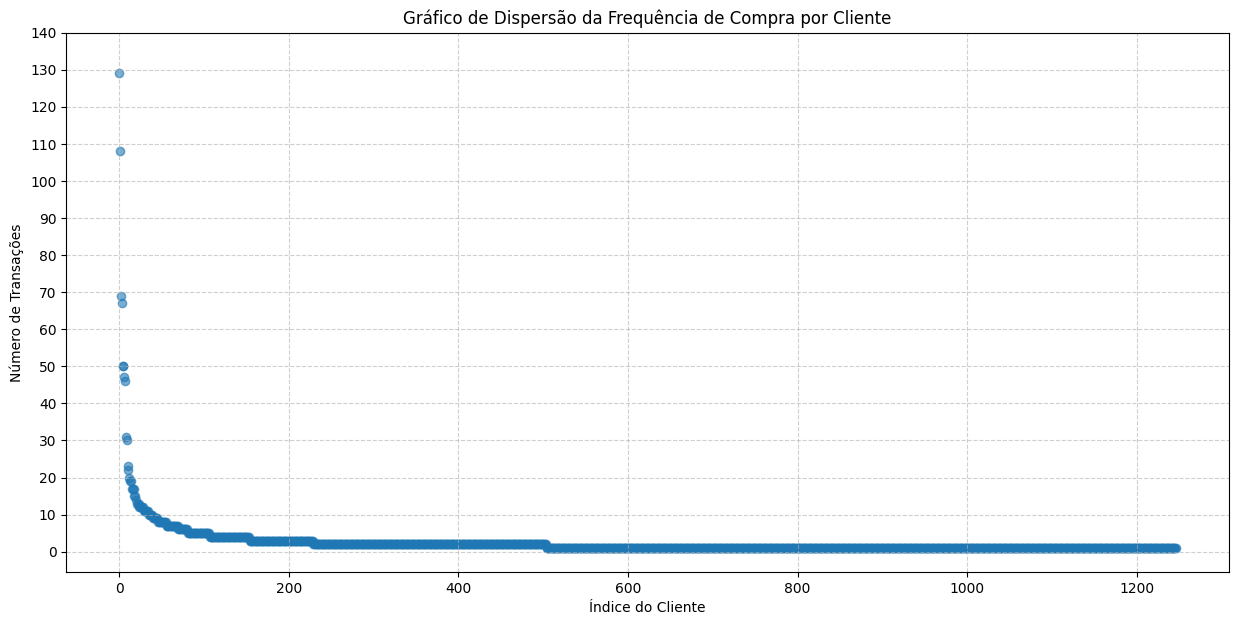

In [ ]:
# Gráfico de dispersão da frequência de compra por cliente
plt.figure(figsize=(15, 7))
plt.scatter(x=customer_transaction_counts.index, y=customer_transaction_counts['transaction_count'], alpha=0.6)
plt.title('Gráfico de Dispersão da Frequência de Compra por Cliente')
plt.xlabel('Índice do Cliente') # O índice representa cada cliente individualmente
plt.ylabel('Número de Transações')
plt.grid(True, linestyle='--', alpha=0.6)
plt.yticks(range(0, int(customer_transaction_counts['transaction_count'].max()) + 20, 10)) # Ajustar eixo Y de 10 em 10
plt.show()

In [ ]:
# 1. Calcular o ticket médio por cliente
average_spend_per_customer = dataset.groupby('card')['money'].mean().reset_index()
average_spend_per_customer.columns = ['card', 'average_spend']

# 2. Calcular o tempo desde a última compra por cliente
# Encontrar a data da última compra para cada cliente
last_purchase_time = dataset.groupby('card')['datetime'].max().reset_index()
last_purchase_time.columns = ['card', 'last_purchase_datetime']

# Definir um ponto de referência (a data mais recente no dataset)
reference_time = dataset['datetime'].max()

# Calcular a diferença de tempo entre o ponto de referência e a última compra de cada cliente
last_purchase_time['time_since_last_purchase'] = (reference_time - last_purchase_time['last_purchase_datetime']).dt.days # Diferença em dias

# Combinar todas as métricas de cliente (contagem de transações, ticket médio, tempo desde a última compra)
# Começamos com as contagens de transação (já calculadas em customer_transaction_counts)
customer_metrics = customer_transaction_counts.copy()

# Combinar com o ticket médio
customer_metrics = pd.merge(customer_metrics, average_spend_per_customer, on='card')

# Combinar com o tempo desde a última compra
customer_metrics = pd.merge(customer_metrics, last_purchase_time[['card', 'time_since_last_purchase']], on='card')

# Renomear as colunas do DataFrame customer_metrics para português
customer_metrics.rename(columns={
    'card': 'Cliente',
    'transaction_count': 'Compras',
    'average_spend': 'Ticket médio',
    'time_since_last_purchase': 'Tempo desde a última compra'
}, inplace=True)



#Exibir estatísticas descritivas das novas métricas
print("\nEstatísticas Descritivas das Métricas de Cliente:")
display(customer_metrics.describe())


Estatísticas Descritivas das Métricas de Cliente:


,Compras,Ticket médio,Tempo desde a última compra
count,1247.000000,1247.000000,1247.000000
mean,2.545309,31.940878,154.859663
std,6.515273,4.633986,96.949270
min,1.000000,18.120000,0.000000
25%,1.000000,27.920000,78.000000
50%,1.000000,32.820000,145.000000
75%,2.000000,35.760000,225.000000
max,129.000000,38.700000,361.000000


In [ ]:
# Filtrar clientes que fizeram mais de uma compra
multi_purchase_customers = customer_transaction_counts[customer_transaction_counts['transaction_count'] > 1]['card']

# Filtrar o dataset original para incluir apenas transações desses clientes
dataset_multi_purchase = dataset[dataset['card'].isin(multi_purchase_customers)].copy()

# Garantir que as transações estejam ordenadas por data/hora para cada cliente
dataset_multi_purchase.sort_values(by=['card', 'datetime'], inplace=True)

# Calcular a diferença de tempo entre transações consecutivas para cada cliente
# Usamos shift(-1) para subtrair a data/hora da compra atual da data/hora da PRÓXIMA compra
# ou shift(1) para subtrair a data/hora da compra ANTERIOR da data/hora da compra atual.
# A segunda opção (shift(1)) é mais comum para calcular o "tempo desde a última compra".
# Para o intervalo ENTRE compras, vamos usar a diferença da data atual para a data anterior.
dataset_multi_purchase['time_diff'] = dataset_multi_purchase.groupby('card')['datetime'].diff()

# Remover a primeira transação de cada cliente, pois a diferença de tempo será NaT (Not a Time)
dataset_multi_purchase.dropna(subset=['time_diff'], inplace=True)

# Calcular o intervalo médio de tempo entre as compras para cada cliente em dias
average_interval_per_customer = dataset_multi_purchase.groupby('card')['time_diff'].mean().dt.days.reset_index()
average_interval_per_customer.columns = ['card', 'Intervalo médio entre compras']

# Exibir estatísticas descritivas do intervalo médio
print("\nEstatísticas Descritivas do Intervalo Médio entre Compras:")
display(average_interval_per_customer.describe())


Estatísticas Descritivas do Intervalo Médio entre Compras:


,Intervalo médio entre compras
count,504.000000
mean,14.738095
std,33.712839
min,0.000000
25%,0.000000
50%,2.000000
75%,12.250000
max,241.000000


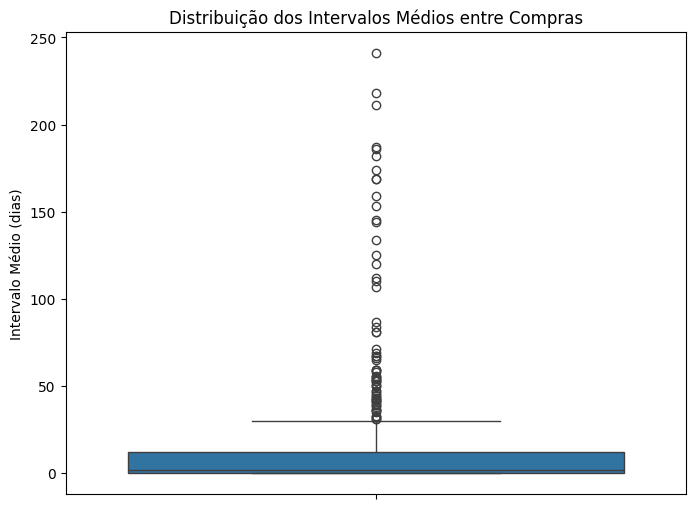

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=average_interval_per_customer['Intervalo médio entre compras'])
plt.title('Distribuição dos Intervalos Médios entre Compras')
plt.ylabel('Intervalo Médio (dias)')
plt.show()

### Observações Gerais
Basicamente, a máquina de venda de café é uma venda de oportunidade. Temos uma quantidade muito pequena de clientes fidelizados (10 clientes fidelizados em mais de 1200 clientes cadastrados) que mostra que a grande maioria das vendas acontecem por clientes que estão passando por ali pontualmente e compram muito pontualmente. No caso desses alguns poucos fidelizados temos alguns que consomem com bastente frequencia.

A falta de fidelização é corroborada também pelo tempo médio desde a última compra e principalmente intervalo médio entre compras (que avalia 505 clientes que comprara mais de uma vez) com uma quantidade grande de outliers com muitos dias de diferença entre uma compra e outra.

O indicado para o negócio é criar ações para aumentar esse base fidelizada, convertendo esses clientes pontuais em fiéis utilizando estratégias de marketing.

## Tratamento de Valores Nulos

O dataset Coffee Sales possui 89 valores nulos na coluna card (que representa o tipo de cartão utilizado). Quando o é em dinheiro, essa área fica sem ser preenchida. Vamos ajustar para substituir esses valores nulos pela informação "cash" que vai sinalizar que foi um pagamento em dinheiro e por isso, não tem realmente um número de cartão associado.

In [ ]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos antes do tratamento:")
display(dataset.isnull().sum())

# Substituir os valores nulos na coluna 'card' por 'cash'
dataset['card'].fillna('cash', inplace=True)


Valores nulos antes do tratamento:


,0
date,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0
hour,0


/tmp/ipython-input-1302255954.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['card'].fillna('cash', inplace=True)


# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

## One-Hot Enconding

Agora, olhando para os produtos vamos usar a técnica para transformar coffee_name, variável categórica nominal em números binários, o que vai facilitar utilizarmos o modelo em alguns algoritmos de machine learning.

In [ ]:
# Aplicar One-Hot Encoding na coluna 'coffee_name'
coffee_name_encoded = pd.get_dummies(dataset['coffee_name'], prefix='coffee')

# Exibir as primeiras linhas do DataFrame codificado
print("Primeiras linhas do DataFrame com 'coffee_name' codificado:")
display(coffee_name_encoded.head())

# Exibir o formato do novo DataFrame para ver as novas colunas
print("\nFormato do DataFrame codificado:")
print(coffee_name_encoded.shape)

Primeiras linhas do DataFrame com 'coffee_name' codificado:


,coffee_Americano,coffee_Americano with Milk,coffee_Cappuccino,coffee_Cocoa,coffee_Cortado,coffee_Espresso,coffee_Hot Chocolate,coffee_Latte
0,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True



Formato do DataFrame codificado:
(3263, 8)


### Combinando dataframe codificado com o atual.

In [ ]:
# Combinar o DataFrame original com o DataFrame codificado
# Vamos remover a coluna 'coffee_name' original antes de concatenar para evitar redundância
dataset_combined = pd.concat([dataset.drop('coffee_name', axis=1), coffee_name_encoded], axis=1)

# Exibir as primeiras linhas do novo DataFrame combinado
print("Primeiras linhas do DataFrame combinado:")
display(dataset_combined.head())

# Opcional: Exibir o formato do DataFrame combinado
print("\nFormato do DataFrame combinado:")
print(dataset_combined.shape)

Primeiras linhas do DataFrame combinado:


,date,datetime,cash_type,card,money,hour,coffee_Americano,coffee_Americano with Milk,coffee_Cappuccino,coffee_Cocoa,coffee_Cortado,coffee_Espresso,coffee_Hot Chocolate,coffee_Latte
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,10,False,False,False,False,False,False,False,True
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,12,False,False,False,False,False,False,True,False
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,12,False,False,False,False,False,False,True,False
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,13,True,False,False,False,False,False,False,False
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,13,False,False,False,False,False,False,False,True



Formato do DataFrame combinado:
(3263, 14)


# Conclusão

Com base na análise exploratória e no pré-processamento do dataset Coffee Sales, podemos tirar várias conclusões importantes sobre o comportamento das vendas e dos clientes:

1.  **Tipos de Café Mais Vendidos:** A análise da distribuição de vendas por tipo de café mostrou claramente quais produtos são os "carros-chefes", com uma concentração significativa das vendas em poucos itens (como Americano with Milk e Latte), representando uma grande porcentagem do total de vendas. Isso sugere que focar na disponibilidade e promoção desses produtos é crucial.

2.  **Distribuição de Vendas por Hora:** O histograma das vendas por hora revelou os períodos de maior movimento ao longo do dia. Identificamos que as vendas ocorrem majoritariamente durante o horário comercial, com alguns picos, mas geralmente uma distribuição relativamente estável durante grande parte do dia, com quedas notáveis em certas horas, possivelmente relacionadas a pausas ou reabastecimento.

3.  **Formas de Pagamento:** A análise das formas de pagamento confirmou a forte preferência dos clientes pelo pagamento via cartão, com o pagamento em dinheiro representando uma parcela muito menor das transações. Isso é uma informação valiosa para a gestão dos métodos de pagamento.

4.  **Análise de Clientes e Fidelização:** A análise das métricas de cliente (contagem de transações, ticket médio, tempo desde a última compra e intervalo médio entre compras) sugere que a grande maioria das vendas provém de clientes com baixa frequência de compra. Um número muito pequeno de clientes se encaixa no critério de "fidelizados" com base na frequência definida. O gráfico de dispersão e a análise do intervalo médio entre compras reforçam a ideia de que a máquina atende principalmente a vendas de oportunidade, com a maioria dos clientes comprando poucas vezes e com longos intervalos entre as compras para aqueles que retornam.

5.  **Recomendações para o Negócio:** Dada a baixa taxa de fidelização, uma recomendação chave seria desenvolver estratégias para aumentar a retenção de clientes e incentivar compras repetidas. Isso poderia incluir programas de fidelidade baseados em cartão, promoções para clientes recorrentes, ou melhorias na experiência de compra para converter clientes pontuais em habituais.

Em resumo, o dataset forneceu insights valiosos sobre o desempenho dos produtos, padrões de vendas ao longo do dia, preferências de pagamento e, crucialmente, a natureza majoritariamente transacional da base de clientes, destacando a necessidade de estratégias focadas em fidelização.

# Implementação dos Algorítmos para sugestão de produto para os clientes

# Problema de negócio
Desenvolver um algoritmo que sugira o melhor café para um cliente com base nos dados fornecidos, utilizando as características 'horário da compra', 'dia da semana', 'valor gasto', 'forma de pagamento' e 'cliente (card)', com o objetivo de prever a bebida que um cliente comprará em um determinado momento.

## Preparação dos dados

Preparando os dados para o modelo de machine learning. Isso inclui lidar com variáveis categóricas e dividir os dados em conjuntos de treinamento e teste.


**Raciocínio**:
Converter a coluna 'datetime' em objetos datetime, extrair a hora e o dia da semana, preencher os valores 'card' ausentes, aplicar codificação one-hot aos recursos categóricos, definir os recursos e o alvo e dividir os dados em conjuntos de treinamento e teste.



In [ ]:
# 1. Converta a coluna 'datetime' para o tipo datetime
dataset['datetime'] = pd.to_datetime(dataset['datetime'])

# 2. Crie novas colunas para 'hora do dia' e 'dia da semana' a partir da coluna 'datetime'
dataset['hour'] = dataset['datetime'].dt.hour
dataset['day_of_week'] = dataset['datetime'].dt.dayofweek # Monday=0, Sunday=6

# 3. Lide com os valores nulos na coluna 'card' substituindo-os por 'cash'
dataset['card'].fillna('cash', inplace=True)

# 4. Aplique one-hot encoding nas colunas categóricas relevantes
categorical_features = ['cash_type', 'card', 'day_of_week']
dataset_processed = pd.get_dummies(dataset, columns=categorical_features, drop_first=True)

# A variável alvo 'coffee_name' também é categórica, mas a codificaremos separadamente se o modelo exigir.
# Para este subtask, vamos manter a coluna original 'coffee_name' como a variável alvo.

# 5. Defina as features (X) e a variável alvo (y)
# Excluímos colunas que não serão usadas como features ou são a variável alvo original/redundante após encoding.
features = dataset_processed.drop(columns=['date', 'datetime', 'coffee_name', 'hour', 'money']) # Removing hour and money as per implied feature selection for encoding
target = dataset_processed['coffee_name']

X = features
y = target

# 6. Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dados preparados para o modelo:")
print("Shape de X_train:", X_train.shape)
print("Shape de X_test:", X_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)

Dados preparados para o modelo:
Shape de X_train: (2610, 1254)
Shape de X_test: (653, 1254)
Shape de y_train: (2610,)
Shape de y_test: (653,)


/tmp/ipython-input-1377241094.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['card'].fillna('cash', inplace=True)


In [ ]:
import pandas as pd

# 1. Converta a coluna 'datetime' para o tipo datetime
dataset['datetime'] = pd.to_datetime(dataset['datetime'])

# 2. Crie novas colunas para 'hora do dia' e 'dia da semana' a partir da coluna 'datetime'
dataset['hour'] = dataset['datetime'].dt.hour
dataset['day_of_week'] = dataset['datetime'].dt.dayofweek # Monday=0, Sunday=6

# 3. Lide com os valores nulos na coluna 'card' substituindo-os por 'cash'
dataset['card'].fillna('cash', inplace=True)

# 4. Aplique one-hot encoding nas colunas categóricas relevantes
categorical_features = ['cash_type', 'card', 'day_of_week']
dataset_processed = pd.get_dummies(dataset, columns=categorical_features, drop_first=True)

# A variável alvo 'coffee_name' também é categórica, mas a codificaremos separadamente se o modelo exigir.
# Para este subtask, vamos manter a coluna original 'coffee_name' como a variável alvo.

# 5. Defina as features (X) e a variável alvo (y)
# Excluímos colunas que não serão usadas como features ou são a variável alvo original/redundante após encoding.
features = dataset_processed.drop(columns=['date', 'datetime', 'coffee_name', 'hour', 'money']) # Removing hour and money as per implied feature selection for encoding
target = dataset_processed['coffee_name']

X = features
y = target

# 6. Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dados preparados para o modelo:")
print("Shape de X_train:", X_train.shape)
print("Shape de X_test:", X_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)

/tmp/ipython-input-1612785834.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['card'].fillna('cash', inplace=True)


Dados preparados para o modelo:
Shape de X_train: (2610, 1254)
Shape de X_test: (653, 1254)
Shape de y_train: (2610,)
Shape de y_test: (653,)


In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/emilianotiago/dados_coffee-sales/refs/heads/main/index_1.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# 1. Converta a coluna 'datetime' para o tipo datetime
dataset['datetime'] = pd.to_datetime(dataset['datetime'])

# 2. Crie novas colunas para 'hora do dia' e 'dia da semana' a partir da coluna 'datetime'
dataset['hour'] = dataset['datetime'].dt.hour
dataset['day_of_week'] = dataset['datetime'].dt.dayofweek # Monday=0, Sunday=6

# 3. Lide com os valores nulos na coluna 'card' substituindo-os por 'cash'
dataset['card'].fillna('cash', inplace=True)

# 4. Aplique one-hot encoding nas colunas categóricas relevantes
categorical_features = ['cash_type', 'card', 'day_of_week']
dataset_processed = pd.get_dummies(dataset, columns=categorical_features, drop_first=True)

# A variável alvo 'coffee_name' também é categórica, mas a codificaremos separadamente se o modelo exigir.
# Para este subtask, vamos manter a coluna original 'coffee_name' como a variável alvo.

# 5. Defina as features (X) e a variável alvo (y)
# Excluímos colunas que não serão usadas como features ou são a variável alvo original/redundante após encoding.
features = dataset_processed.drop(columns=['date', 'datetime', 'coffee_name', 'hour', 'money']) # Removing hour and money as per implied feature selection for encoding
target = dataset_processed['coffee_name']

X = features
y = target

# 6. Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dados preparados para o modelo:")
print("Shape de X_train:", X_train.shape)
print("Shape de X_test:", X_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)

Dados preparados para o modelo:
Shape de X_train: (2610, 1254)
Shape de X_test: (653, 1254)
Shape de y_train: (2610,)
Shape de y_test: (653,)


/tmp/ipython-input-2543397595.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['card'].fillna('cash', inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/emilianotiago/dados_coffee-sales/refs/heads/main/index_1.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# 1. Converta a coluna 'datetime' para o tipo datetime
dataset['datetime'] = pd.to_datetime(dataset['datetime'])

# 2. Crie novas colunas para 'hora do dia' e 'dia da semana' a partir da coluna 'datetime'
dataset['hour'] = dataset['datetime'].dt.hour
dataset['day_of_week'] = dataset['datetime'].dt.dayofweek # Monday=0, Sunday=6

# 3. Lide com os valores nulos na coluna 'card' substituindo-os por 'cash'
dataset['card'] = dataset['card'].fillna('cash') # Corrected inplace warning

# 4. Aplique one-hot encoding nas colunas categóricas relevantes
categorical_features = ['cash_type', 'card', 'day_of_week']
dataset_processed = pd.get_dummies(dataset, columns=categorical_features, drop_first=True)

# A variável alvo 'coffee_name' também é categórica, mas a codificaremos separadamente se o modelo exigir.
# Para este subtask, vamos manter a coluna original 'coffee_name' como a variável alvo.

# 5. Defina as features (X) e a variável alvo (y)
# Excluímos colunas que não serão usadas como features ou são a variável alvo original/redundante após encoding.
features = dataset_processed.drop(columns=['date', 'datetime', 'coffee_name', 'hour', 'money'])
target = dataset_processed['coffee_name']

X = features
y = target

# 6. Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dados preparados para o modelo:")
print("Shape de X_train:", X_train.shape)
print("Shape de X_test:", X_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)

Dados preparados para o modelo:
Shape de X_train: (2610, 1254)
Shape de X_test: (653, 1254)
Shape de y_train: (2610,)
Shape de y_test: (653,)


## Engenharia de atributos

Criar novos atributos a partir dos dados existentes que podem melhorar o desempenho do modelo, como extrair o dia da semana da data.


In [ ]:
# 1. Check if 'hour' and 'day_of_week' columns exist in dataset_processed
# Note: In the previous step, 'hour' and 'day_of_week' were created in the original 'dataset'
# and 'day_of_week' was one-hot encoded into 'dataset_processed'.
# 'hour' was dropped from the features in the previous step. We need to add it back.

# Re-load the original dataset to ensure we have 'datetime' to extract 'hour' and 'day_of_week' if needed
# Although it's already in the environment, this makes the code block self-contained if run alone.
url = "https://raw.githubusercontent.com/emilianotiago/dados_coffee-sales/refs/heads/main/index_1.csv"
dataset = pd.read_csv(url, delimiter=',')

# Convert 'datetime' to datetime objects
dataset['datetime'] = pd.to_datetime(dataset['datetime'])

# 2. Extract 'hour' and 'day_of_week' if they don't exist (re-doing this to be safe)
if 'hour' not in dataset.columns:
    dataset['hour'] = dataset['datetime'].dt.hour
if 'day_of_week' not in dataset.columns:
    dataset['day_of_week'] = dataset['datetime'].dt.dayofweek # Monday=0, Sunday=6

# Handle missing 'card' values again
dataset['card'] = dataset['card'].fillna('cash')

# 3. Apply one-hot encoding including 'day_of_week', 'cash_type', and 'card'
# We need to re-apply encoding to include 'day_of_week' if it wasn't fully handled before
# and ensure 'hour' and 'money' are included in features this time.
categorical_features_for_encoding = ['cash_type', 'card', 'day_of_week']
dataset_processed = pd.get_dummies(dataset, columns=categorical_features_for_encoding, drop_first=True)

# 4. Update the features (X) and the target (y)
# Include 'hour' and 'money' as numerical features.
# Exclude original 'date', 'datetime', 'coffee_name', and the original categorical columns
# that were one-hot encoded.
features = dataset_processed.drop(columns=['date', 'datetime', 'coffee_name']) # Keep 'hour' and 'money' this time
target = dataset_processed['coffee_name']

X = features
y = target

# 5. Re-split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Display the first lines and shape of the new X and the shapes of train/test sets
print("Primeiras linhas do novo DataFrame de features (X):")
display(X.head())

print("\nShape do novo DataFrame de features (X):")
print(X.shape)

print("\nShapes dos conjuntos de treinamento e teste:")
print("Shape de X_train:", X_train.shape)
print("Shape de X_test:", X_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)

Primeiras linhas do novo DataFrame de features (X):


,money,hour,cash_type_cash,card_ANON-0000-0000-0002,card_ANON-0000-0000-0003,card_ANON-0000-0000-0004,card_ANON-0000-0000-0005,card_ANON-0000-0000-0006,card_ANON-0000-0000-0007,card_ANON-0000-0000-0008,...,card_ANON-0000-0000-1245,card_ANON-0000-0000-1246,card_ANON-0000-0000-1247,card_cash,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,38.7,10,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38.7,12,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38.7,12,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,28.9,13,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,38.7,13,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False



Shape do novo DataFrame de features (X):
(3263, 1256)

Shapes dos conjuntos de treinamento e teste:
Shape de X_train: (2610, 1256)
Shape de X_test: (653, 1256)
Shape de y_train: (2610,)
Shape de y_test: (653,)


## Seleção do modelo


Modelos de Classificação Potenciais:
1. Regressão Logística (Logistic Regression):
   - Justificativa: Embora fundamentalmente um modelo linear, a Regressão Logística pode ser estendida para classificação multiclasse (usando estratégias One-vs-Rest ou multinomial). É computacionalmente eficiente e pode servir como um bom modelo de baseline. No entanto, pode ter dificuldades com a alta dimensionalidade introduzida pelos IDs de cartão.

2. Máquinas de Vetor de Suporte (Support Vector Machines - SVM):
   - Justificativa: SVMs, especialmente com kernels não lineares (como RBF), são poderosas para classificação e podem lidar com espaços de alta dimensão. No entanto, o treinamento pode ser computacionalmente caro com grandes datasets e muitos features.

3. Árvores de Decisão e Random Forests:
   - Justificativa: Modelos baseados em árvores podem capturar interações não lineares entre features. Random Forests, sendo um conjunto de árvores de decisão, geralmente oferecem melhor desempenho e robustez contra overfitting do que árvores únicas. Eles lidam bem com diferentes tipos de features e não são tão sensíveis à escala dos dados.

4. Gradient Boosting Machines (Ex: LightGBM, XGBoost, CatBoost):
   - Justificativa: Modelos de boosting são frequentemente os de melhor desempenho em problemas de classificação tabular. Eles constroem modelos sequencialmente, corrigindo erros de modelos anteriores. São eficientes e podem lidar com alta dimensionalidade, embora exijam ajuste de hiperparâmetros cuidadoso.

5. K-Vizinhos Mais Próximos (K-Nearest Neighbors - KNN):
   - Justificativa: KNN é um classificador simples e não paramétrico. A previsão é baseada na maioria das classes dos k vizinhos mais próximos no espaço de features. Pode ser sensível à escala dos features e ao grande número de dimensões (maldição da dimensionalidade), o que pode ser um problema com os IDs de cartão codificados.

Delecionaremos o Random Forest Classifier.

Random Forest é uma escolha robusta para classificação multiclasse, lida bem com a mistura de features numéricas e categóricas (codificadas), é menos propenso a overfitting do que árvores únicas e geralmente oferece um bom equilíbrio entre desempenho e interpretabilidade inicial em comparação com modelos de boosting mais complexos. Embora a alta dimensionalidade dos IDs de cartão seja um desafio potencial, Random Forest pode gerenciar isso melhor do que modelos lineares simples ou KNN.

## Treinamento do modelo

Treinando o modelo Random Forest Classifier selecionado usando os dados de treinamento preparados.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier model
# Using default parameters initially, random_state for reproducibility
model = RandomForestClassifier(random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

print("Modelo RandomForestClassifier treinado com sucesso.")

Modelo RandomForestClassifier treinado com sucesso.


## Avaliação do modelo

Aqui, é subir algumas métricas de avaliação do modelo, para entender se foi eficiente na determinação do produto.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Fazer previsões no conjunto de teste X_test usando o modelo treinado.
y_pred = model.predict(X_test)

# 3. Calcular a acurácia do modelo comparando as previsões com os valores reais y_test.
accuracy = accuracy_score(y_test, y_pred)

# 4. Gerar um relatório de classificação que inclua precisão, recall, f1-score e suporte para cada classe (tipo de café).
class_report = classification_report(y_test, y_pred)

# 5. Gerar uma matriz de confusão para visualizar o desempenho do classificador em cada classe.
conf_matrix = confusion_matrix(y_test, y_pred)

# 6. Exibir a acurácia, o relatório de classificação e a matriz de confusão.
print(f"Acurácia do modelo: {accuracy:.4f}")
print("\nRelatório de Classificação:")
print(class_report)
print("\nMatriz de Confusão:")
display(conf_matrix)

Acurácia do modelo: 0.6585

Relatório de Classificação:
                     precision    recall  f1-score   support

          Americano       0.72      0.84      0.78        82
Americano with Milk       0.86      0.92      0.89       167
         Cappuccino       0.60      0.39      0.47        94
              Cocoa       0.35      0.17      0.23        41
            Cortado       0.82      0.56      0.67        57
           Espresso       1.00      0.50      0.67        18
      Hot Chocolate       0.38      0.32      0.35        44
              Latte       0.51      0.73      0.60       150

           accuracy                           0.66       653
          macro avg       0.66      0.55      0.58       653
       weighted avg       0.66      0.66      0.65       653


Matriz de Confusão:


array([[ 69,   9,   0,   0,   4,   0,   0,   0],
       [  3, 153,   1,   0,   0,   0,   0,  10],
       [  0,   3,  37,   3,   0,   0,   5,  46],
       [  0,   1,   2,   7,   0,   0,   3,  28],
       [ 19,   6,   0,   0,  32,   0,   0,   0],
       [  5,   1,   0,   0,   3,   9,   0,   0],
       [  0,   1,   4,   5,   0,   0,  14,  20],
       [  0,   3,  18,   5,   0,   0,  15, 109]])

## Lógica de recomendação




 Definimos uma função para fazer recomendações de café com base nas características do cliente usando o modelo treinado.



In [ ]:
import pandas as pd

def recommend_coffee(model, customer_features: pd.DataFrame):
  """
  Recomenda o melhor café para um cliente com base em suas características
  usando um modelo de classificação treinado.

  Args:
    model: O modelo de classificação treinado (sklearn-compatible).
    customer_features: Um DataFrame contendo as características do cliente,
                       no mesmo formato que os dados de treinamento (X_train).

  Returns:
    A previsão do modelo para o tipo de café mais provável.
  """
  # Usar o modelo treinado para fazer a previsão
  predicted_coffee = model.predict(customer_features)

  # Retornar a previsão
  return predicted_coffee[0]

# Opcional: Criar um exemplo de características de cliente fictício
# Assegure que as colunas e a ordem sejam as mesmas de X_train
# Você precisará saber as colunas exatas de X_train. Vamos obter as colunas de X_train
train_cols = X_train.columns

# Criar um DataFrame com uma única linha representando um cliente fictício
# Exemplo: um cliente que paga com cartão, compra às 10h, gastou 35.00, em uma Segunda-feira (dia_of_week_0)
# e tem um ID de cartão específico (substitua por um ID real ou crie um fictício presente nos dados de treino)
# Para simplificar o exemplo, vamos criar um cliente com valores médios para 'money' e 'hour'
# e definir algumas características categóricas.
# IMPORTANTE: Para um cliente real, você precisaria obter as características reais dele.

# Criar um DataFrame com todas as colunas de treino, inicializadas com 0 ou False
sample_customer_features = pd.DataFrame(columns=train_cols)
sample_customer_features.loc[0] = 0 # Initialize with 0 (or False for boolean columns)

# Definir algumas características para o cliente fictício
sample_customer_features.loc[0, 'money'] = 32.00 # Exemplo de valor gasto
sample_customer_features.loc[0, 'hour'] = 11 # Exemplo de hora da compra (11h)
sample_customer_features.loc[0, 'cash_type_cash'] = False # Pagamento com cartão (não é cash)
# Exemplo: cliente com um card ID específico que existe nos dados de treino (escolha um aleatório)
# Encontre um card ID que apareça em X_train
example_card_id = X_train.columns[X_train.columns.str.startswith('card_')].tolist()[0] # Pega o primeiro card_ column como exemplo
sample_customer_features.loc[0, example_card_id] = True # Definir o card_ ID

# Exemplo: Compra em uma Terça-feira (dia_of_week_1)
# Note: drop_first=True foi usado, então dia_of_week_0 (Monday) não existe como coluna.
# Tuesday (1) is represented by day_of_week_1 = True
sample_customer_features.loc[0, 'day_of_week_1'] = True


# Fazer a recomendação usando a função
recommended = recommend_coffee(model, sample_customer_features)

print(f"\nCaracterísticas do cliente fictício:")
display(sample_customer_features)
print(f"\nO café recomendado para este cliente é: {recommended}")


Características do cliente fictício:


/tmp/ipython-input-2410750537.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sample_customer_features.loc[0, 'cash_type_cash'] = False # Pagamento com cartão (não é cash)
/tmp/ipython-input-2410750537.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sample_customer_features.loc[0, example_card_id] = True # Definir o card_ ID
/tmp/ipython-input-2410750537.py:50: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sample_customer_features.loc[0, 'day_of_week_

,money,hour,cash_type_cash,card_ANON-0000-0000-0002,card_ANON-0000-0000-0003,card_ANON-0000-0000-0004,card_ANON-0000-0000-0005,card_ANON-0000-0000-0006,card_ANON-0000-0000-0007,card_ANON-0000-0000-0008,...,card_ANON-0000-0000-1245,card_ANON-0000-0000-1246,card_ANON-0000-0000-1247,card_cash,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,32,11,False,True,0,0,0,0,0,0,...,0,0,0,0,True,0,0,0,0,0



O café recomendado para este cliente é: Latte


## Resumo:


O conjunto de dados foi carregado e pré-processado, incluindo:

* Conversão da coluna datetime;

* Extração das variáveis hora e dia_da_semana;

* Tratamento de valores ausentes em card (imputados como "cash");

* Aplicação de one-hot encoding para variáveis categóricas (cash_type, card, day_of_week).

* Novas variáveis (hour e as dummies de day_of_week) foram criadas e incluídas no conjunto de features.

* O conjunto final de features (X) contém 1.256 colunas após a codificação, incluindo as variáveis numéricas money e hour, além das categóricas codificadas.

* Os dados foram divididos em treino (80%) e teste (20%).

* O modelo RandomForestClassifier foi escolhido pela sua robustez, capacidade de lidar com dados mistos e equilíbrio entre desempenho e interpretabilidade.

* O modelo foi treinado com sucesso nos dados de treino.

* O modelo obteve uma acurácia de aproximadamente 0,6585 no conjunto de teste.

* As métricas de avaliação mostraram desempenho variável entre os diferentes tipos de café:

* “Americano with Milk” e “Espresso” apresentaram melhor precisão e recall;

* Classes menos frequentes, como “Cocoa” e “Hot Chocolate”, tiveram desempenho inferior.

* Foi desenvolvida uma função recommend_coffee que recebe o modelo treinado e as features do cliente como entrada e retorna uma recomendação de café baseada na predição, que era o objeitvo inicial.


